In [137]:
import time
import csv

import numpy as np
import pandas as pd

from scapy.all import *

In [ ]:
# Reference - https://github.com/fisher85/ml-cybersecurity/blob/master/python-web-attack-detection/web-attack-detection.ipynb

In [138]:
# Compiling classical ML models on the engineered CSV file named Wednesday-workingHours.csv & Tuesday-workingHours.csv

In [139]:
# Change this based on CSV file location
csv_file = 'C:/Users/sinja/OneDrive/Desktop/submit/Wednesday-workingHours.csv'

file = pd.read_csv(csv_file)
file = file[file[' Label'].isin(['BENIGN', 'DoS GoldenEye', 'Heartbleed'])]

print(file)

         Destination Port   Flow Duration   Total Fwd Packets  \
0                      80           38308                   1   
1                     389             479                  11   
2                      88            1095                  10   
3                     389           15206                  17   
4                      88            1092                   9   
...                   ...             ...                 ...   
692698                 53           32215                   4   
692699                 53             324                   2   
692700              58030              82                   2   
692701                 53         1048635                   6   
692702                 53           94939                   4   

         Total Backward Packets  Total Length of Fwd Packets  \
0                             1                            6   
1                             5                          172   
2                          

In [140]:
print("File columns:")
print(file.columns)

print("\nData value counts:")
print(file[' Label'].value_counts())

File columns:
Index([' Destination Port', ' Flow Duration', ' Total Fwd Packets',
       ' Total Backward Packets', 'Total Length of Fwd Packets',
       ' Total Length of Bwd Packets', ' Fwd Packet Length Max',
       ' Fwd Packet Length Min', ' Fwd Packet Length Mean',
       ' Fwd Packet Length Std', 'Bwd Packet Length Max',
       ' Bwd Packet Length Min', ' Bwd Packet Length Mean',
       ' Bwd Packet Length Std', 'Flow Bytes/s', ' Flow Packets/s',
       ' Flow IAT Mean', ' Flow IAT Std', ' Flow IAT Max', ' Flow IAT Min',
       'Fwd IAT Total', ' Fwd IAT Mean', ' Fwd IAT Std', ' Fwd IAT Max',
       ' Fwd IAT Min', 'Bwd IAT Total', ' Bwd IAT Mean', ' Bwd IAT Std',
       ' Bwd IAT Max', ' Bwd IAT Min', 'Fwd PSH Flags', ' Bwd PSH Flags',
       ' Fwd URG Flags', ' Bwd URG Flags', ' Fwd Header Length',
       ' Bwd Header Length', 'Fwd Packets/s', ' Bwd Packets/s',
       ' Min Packet Length', ' Max Packet Length', ' Packet Length Mean',
       ' Packet Length Std', ' Packet Lengt

In [141]:
from sklearn.utils import resample

benign = file[file[' Label'] == 'BENIGN']
dos_goldeneye = file[file[' Label'] == 'DoS GoldenEye']
heartbleed = file[file[' Label'] == 'Heartbleed']

target_benign_count = 20586

benign_downsampled = benign.sample(target_benign_count, random_state = 1)

target_heartbleed_count = target_benign_count // 2

heartbleed_upsampled = resample(heartbleed, replace = True, 
                                n_samples = target_heartbleed_count, random_state = 1)

file = pd.concat([benign_downsampled, dos_goldeneye, heartbleed_upsampled])

print("File columns:")
print(file.columns)

print("\nData value counts:")
print(file[' Label'].value_counts())

File columns:
Index([' Destination Port', ' Flow Duration', ' Total Fwd Packets',
       ' Total Backward Packets', 'Total Length of Fwd Packets',
       ' Total Length of Bwd Packets', ' Fwd Packet Length Max',
       ' Fwd Packet Length Min', ' Fwd Packet Length Mean',
       ' Fwd Packet Length Std', 'Bwd Packet Length Max',
       ' Bwd Packet Length Min', ' Bwd Packet Length Mean',
       ' Bwd Packet Length Std', 'Flow Bytes/s', ' Flow Packets/s',
       ' Flow IAT Mean', ' Flow IAT Std', ' Flow IAT Max', ' Flow IAT Min',
       'Fwd IAT Total', ' Fwd IAT Mean', ' Fwd IAT Std', ' Fwd IAT Max',
       ' Fwd IAT Min', 'Bwd IAT Total', ' Bwd IAT Mean', ' Bwd IAT Std',
       ' Bwd IAT Max', ' Bwd IAT Min', 'Fwd PSH Flags', ' Bwd PSH Flags',
       ' Fwd URG Flags', ' Bwd URG Flags', ' Fwd Header Length',
       ' Bwd Header Length', 'Fwd Packets/s', ' Bwd Packets/s',
       ' Min Packet Length', ' Max Packet Length', ' Packet Length Mean',
       ' Packet Length Std', ' Packet Lengt

In [142]:
# Replacing non-numerical values
file.replace('Infinity', -1, inplace = True)

# Replacing NaN and Infinite values with -1
file.replace([np.inf, -np.inf, np.nan], -1, inplace = True)

# Converting 'Attack_Label' into binary format
file[' Label'] = np.where(file[' Label'] == 'BENIGN', 0, 1)

In [143]:
# Extracting 'Attack_Label' as 'y'
y = file[' Label'].values

# Extracting remaining columns as 'x'
x = file.drop(columns = [' Label'])

print("Before Scaling:")
print("\nY Values:")
print(y)
print("\nX Values:")
print(x)

Before Scaling:

Y Values:
[0 0 0 ... 1 1 1]

X Values:
         Destination Port   Flow Duration   Total Fwd Packets  \
4104                   80          261686                   1   
653841                 53             165                   2   
458764                443          334914                   7   
486898                 53           24054                   1   
59038               56082              47                   1   
...                   ...             ...                 ...   
597807                444       119299621                2805   
597825                444        24719667                 590   
597813                444       119296592                2797   
597510                444       119259886                2782   
597277                444       119297996                2782   

         Total Backward Packets  Total Length of Fwd Packets  \
4104                          1                            6   
653841                        2    

In [144]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

# Fitting and transforming the features using Min-Max Scaling
x = scaler.fit_transform(x)

print("After Scaling:")
print("\nY Values:")
print(y)
print("\nX Values:")
print(x)

After Scaling:

Y Values:
[0 0 0 ... 1 1 1]

X Values:
[[1.23073136e-03 2.18072377e-03 0.00000000e+00 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [8.15359527e-04 1.37500448e-06 5.52819101e-06 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [6.81517492e-03 2.79095909e-03 3.31691461e-05 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 ...
 [6.83055906e-03 9.94141506e-01 1.54568221e-02 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [6.83055906e-03 9.93835622e-01 1.53738992e-02 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [6.83055906e-03 9.94153206e-01 1.53738992e-02 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]]


In [145]:
from sklearn.model_selection import train_test_split

# Splitting the data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size = 0.7, test_size = 0.3, random_state = 42)

print("Y Train:")
print(y_train)
print("\nX Train:")
print(x_train)

print("\nY Test:")
print(y_test)
print("\nX Test:")
print(x_test)

Y Train:
[0 1 1 ... 1 0 0]

X Train:
[[5.68290206e-01 4.66668187e-07 0.00000000e+00 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [6.83055906e-03 9.93845888e-01 1.54402375e-02 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [6.83055906e-03 9.93855030e-01 1.54291811e-02 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 ...
 [6.83055906e-03 9.94166748e-01 1.55010476e-02 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [7.34100489e-01 1.07008682e-04 1.65845730e-05 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [8.15359527e-04 1.47833815e-05 5.52819101e-06 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]]

Y Test:
[1 1 1 ... 1 0 1]

X Test:
[[6.83055906e-03 9.93839030e-01 1.54236529e-02 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [1.23073136e-03 9.62191552e-02 4.42255281e-05 ... 0.00000000e+00
  5.45295000e-02 5.45295000e-02]
 [6.83055906e-03 2.05997896e-01 3.25610450e-03 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 ...
 [6.83055906e-03 9.938283

In [146]:
# Change this based on CSV file location
csv_file = 'C:/Users/sinja/OneDrive/Desktop/submit/Tuesday-workingHours.csv'

file = pd.read_csv(csv_file)
file = file[file[' Label'].isin(['BENIGN', 'SSH-Patator'])]

print(file)

                                       Flow ID      Source IP   Source Port  \
0         192.168.10.3-192.168.10.5-88-49182-6   192.168.10.5         49182   
1         192.168.10.3-192.168.10.5-88-49183-6   192.168.10.5         49183   
2         192.168.10.3-192.168.10.5-88-49184-6   192.168.10.5         49184   
3         192.168.10.3-192.168.10.5-88-49185-6   192.168.10.5         49185   
4         192.168.10.3-192.168.10.5-88-49186-6   192.168.10.5         49186   
...                                        ...            ...           ...   
445904  192.168.10.3-192.168.10.14-53-51694-17  192.168.10.14         51694   
445905   192.168.10.15-192.0.77.32-59317-443-6    192.0.77.32           443   
445906  192.168.10.3-192.168.10.50-53-62256-17  192.168.10.50         62256   
445907  192.168.10.25-52.84.145.70-54726-443-6   52.84.145.70           443   
445908   192.168.10.3-192.168.10.9-53-51801-17   192.168.10.9         51801   

        Destination IP   Destination Port   Protoco

In [147]:
print("File columns:")
print(file.columns)

print("\nData value counts:")
print(file[' Label'].value_counts())

File columns:
Index(['Flow ID', ' Source IP', ' Source Port', ' Destination IP',
       ' Destination Port', ' Protocol', ' Timestamp', ' Flow Duration',
       ' Total Fwd Packets', ' Total Backward Packets',
       'Total Length of Fwd Packets', ' Total Length of Bwd Packets',
       ' Fwd Packet Length Max', ' Fwd Packet Length Min',
       ' Fwd Packet Length Mean', ' Fwd Packet Length Std',
       'Bwd Packet Length Max', ' Bwd Packet Length Min',
       ' Bwd Packet Length Mean', ' Bwd Packet Length Std', 'Flow Bytes/s',
       ' Flow Packets/s', ' Flow IAT Mean', ' Flow IAT Std', ' Flow IAT Max',
       ' Flow IAT Min', 'Fwd IAT Total', ' Fwd IAT Mean', ' Fwd IAT Std',
       ' Fwd IAT Max', ' Fwd IAT Min', 'Bwd IAT Total', ' Bwd IAT Mean',
       ' Bwd IAT Std', ' Bwd IAT Max', ' Bwd IAT Min', 'Fwd PSH Flags',
       ' Bwd PSH Flags', ' Fwd URG Flags', ' Bwd URG Flags',
       ' Fwd Header Length', ' Bwd Header Length', 'Fwd Packets/s',
       ' Bwd Packets/s', ' Min Packet Len

In [148]:
benign = file[file[' Label'] == 'BENIGN']
ssh = file[file[' Label'] == 'SSH-Patator']

target_benign_count = 20586

benign_downsampled = benign.sample(target_benign_count, random_state = 1)

target_ssh_count = target_benign_count // 2

ssh_upsampled = resample(ssh, replace = True, n_samples = target_ssh_count, random_state = 1)

file = pd.concat([benign_downsampled, ssh_upsampled])

print("File columns:")
print(file.columns)

print("\nData value counts:")
print(file[' Label'].value_counts())

File columns:
Index(['Flow ID', ' Source IP', ' Source Port', ' Destination IP',
       ' Destination Port', ' Protocol', ' Timestamp', ' Flow Duration',
       ' Total Fwd Packets', ' Total Backward Packets',
       'Total Length of Fwd Packets', ' Total Length of Bwd Packets',
       ' Fwd Packet Length Max', ' Fwd Packet Length Min',
       ' Fwd Packet Length Mean', ' Fwd Packet Length Std',
       'Bwd Packet Length Max', ' Bwd Packet Length Min',
       ' Bwd Packet Length Mean', ' Bwd Packet Length Std', 'Flow Bytes/s',
       ' Flow Packets/s', ' Flow IAT Mean', ' Flow IAT Std', ' Flow IAT Max',
       ' Flow IAT Min', 'Fwd IAT Total', ' Fwd IAT Mean', ' Fwd IAT Std',
       ' Fwd IAT Max', ' Fwd IAT Min', 'Bwd IAT Total', ' Bwd IAT Mean',
       ' Bwd IAT Std', ' Bwd IAT Max', ' Bwd IAT Min', 'Fwd PSH Flags',
       ' Bwd PSH Flags', ' Fwd URG Flags', ' Bwd URG Flags',
       ' Fwd Header Length', ' Bwd Header Length', 'Fwd Packets/s',
       ' Bwd Packets/s', ' Min Packet Len

In [149]:
# Replacing non-numerical values
file.replace('Infinity', -1, inplace = True)

# Replacing NaN and Infinite values with -1
file.replace([np.inf, -np.inf, np.nan], -1, inplace = True)

# Converting 'Attack_Label' into binary format
file[' Label'] = np.where(file[' Label'] == 'BENIGN', 0, 1)

In [150]:
# Extracting 'Attack_Label' as 'y'
y = file[' Label'].values

# Extracting remaining columns as 'x'
x = file.drop(columns = ['Flow ID', ' Timestamp', ' Protocol', ' Source Port', 
                         ' Source IP', ' Destination IP', ' Label'])

print("Before Scaling:")
print("\nY Values:")
print(y)
print("\nX Values:")
print(x)

Before Scaling:

Y Values:
[0 0 0 ... 1 1 1]

X Values:
         Destination Port   Flow Duration   Total Fwd Packets  \
94478                 443          109874                  12   
401980                 53             162                   2   
270068                443        13587231                  18   
57256                  53       107430516                   2   
49572               42657               3                   2   
...                   ...             ...                 ...   
415466                 22        11554038                  22   
205604                 22        13864452                  21   
188842                 22              79                   1   
394733                 22              59                   1   
383139                 22              78                   1   

         Total Backward Packets  Total Length of Fwd Packets  \
94478                         8                          643   
401980                        2    

In [151]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

# Fitting and transforming the features using Min-Max Scaling
x = scaler.fit_transform(x)

print("After Scaling:")
print("\nY Values:")
print(y)
print("\nX Values:")
print(x)

After Scaling:

Y Values:
[0 0 0 ... 1 1 1]

X Values:
[[6.78480082e-03 9.15636041e-04 4.36161776e-03 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [8.11725606e-04 1.35834971e-06 3.96510706e-04 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [6.78480082e-03 1.13228299e-01 6.74068200e-03 ... 0.00000000e+00
  8.21718417e-02 8.21718417e-02]
 ...
 [3.36942704e-04 6.66674706e-07 0.00000000e+00 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [3.36942704e-04 5.00006029e-07 0.00000000e+00 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [3.36942704e-04 6.58341272e-07 0.00000000e+00 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]]


In [152]:
# Concatenating x_test with x
x_test = np.concatenate((x_test, x), axis = 0)

# Concatenating y_test with y
y_test = np.concatenate((y_test, y), axis = 0)

print("\nX Train:")
print(x_train)
print("\nY Train:")
print(y_train)
print("\nX Test:")
print(x_test)
print("\nY Test:")
print(y_test)


X Train:
[[5.68290206e-01 4.66668187e-07 0.00000000e+00 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [6.83055906e-03 9.93845888e-01 1.54402375e-02 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [6.83055906e-03 9.93855030e-01 1.54291811e-02 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 ...
 [6.83055906e-03 9.94166748e-01 1.55010476e-02 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [7.34100489e-01 1.07008682e-04 1.65845730e-05 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [8.15359527e-04 1.47833815e-05 5.52819101e-06 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]]

Y Train:
[0 1 1 ... 1 0 0]

X Test:
[[6.83055906e-03 9.93839030e-01 1.54236529e-02 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [1.23073136e-03 9.62191552e-02 4.42255281e-05 ... 0.00000000e+00
  5.45295000e-02 5.45295000e-02]
 [6.83055906e-03 2.05997896e-01 3.25610450e-03 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 ...
 [3.36942704e-04 6.66674706e-07 0.00000000e+00 ... 

In [132]:
from sklearn.model_selection import GridSearchCV

from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix, plot_confusion_matrix
from sklearn.model_selection import learning_curve
import matplotlib.pyplot as plt

import seaborn as sn 

Time consumed to fit model is  451.4547336101532
The best parameter is:
{'max_depth': 20, 'max_features': 1, 'n_estimators': 50}
Classification Report for Test Set:
              precision    recall  f1-score   support

           0       0.72      1.00      0.84     26758
           1       1.00      0.37      0.55     16473

    accuracy                           0.76     43231
   macro avg       0.86      0.69      0.69     43231
weighted avg       0.83      0.76      0.73     43231



Text(0.5, 1.0, 'Confusion Matrix - Random Forest (Test Set)')

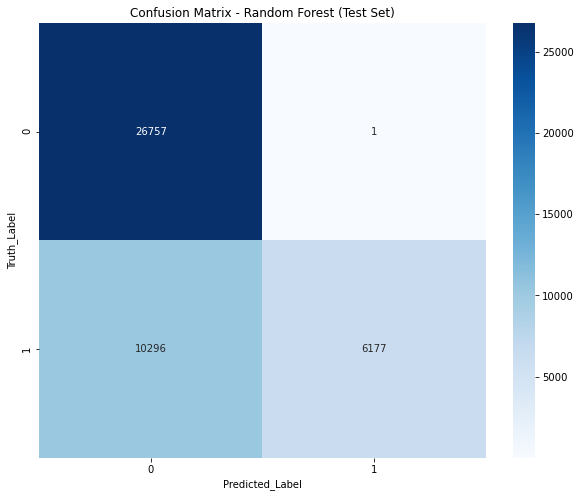

In [133]:
# Random Forest 

# Reference - https://www.kaggle.com/code/sociopath00/random-forest-using-gridsearchcv

from sklearn.ensemble import RandomForestClassifier

# Calculating class weights
tot_samples = len(y_train)
benign_samples = len(y_train[y_train == 0])
attack_samples = len(y_train[y_train == 1])

class_weight_benign = tot_samples / (2 * benign_samples)
class_weight_attack = tot_samples / (2 * attack_samples)

class_weights = {0: class_weight_benign, 
                 1: class_weight_attack}

rfc = RandomForestClassifier(class_weight = class_weights, 
                             n_estimators = 100, 
                             max_depth = 20,
                             random_state = 4)

# Defining parameter range
param_grid = dict(max_features = np.arange(1, 4, 1), 
                  n_estimators = [50, 100, 150, 200], 
                  max_depth = np.arange(10, 30, 5))

# Parameter Description
# max_features = number of features to consider when looking for the best split
# n_estimators = number of trees in the forest

grid = GridSearchCV(estimator = rfc, param_grid = param_grid, cv = 5)

start = time.time()

# Fitting the model for grid search
grid.fit(x_train, y_train.ravel())

end = time.time()

print("Time consumed to fit model is ", end - start)

print("The best parameter is:")
print(grid.best_params_)

# Predictions on the test set
grid_predictions = grid.predict(x_test)

print("Classification Report for Test Set:")
print(classification_report(y_test.ravel(), grid_predictions, zero_division = 0))

# Plotting the Confusion Matrix for the test set
conf_matrix = confusion_matrix(y_test.ravel(), grid_predictions)
plt.figure(figsize = (10, 8))
sn.heatmap(conf_matrix, annot = True, cmap = 'Blues', fmt = 'd', cbar = True)
plt.xlabel('Predicted_Label')
plt.ylabel('Truth_Label')
plt.title('Confusion Matrix - Random Forest (Test Set)')

Time consumed to fit model is  32.02381753921509
The best parameter is:
{'C': 1, 'gamma': 0.01, 'kernel': 'linear'}
Classification Report for Test Set:
              precision    recall  f1-score   support

           0       0.71      0.94      0.81     26758
           1       0.79      0.37      0.51     16473

    accuracy                           0.72     43231
   macro avg       0.75      0.66      0.66     43231
weighted avg       0.74      0.72      0.69     43231



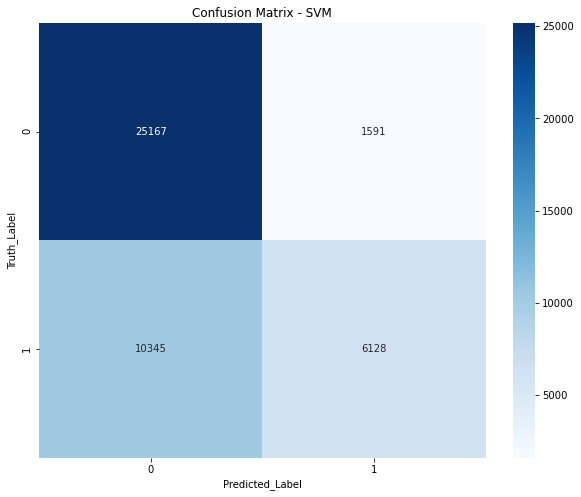

In [134]:
# SVM

# Reference - https://medium.com/swlh/hyperparameter-tuning-of-support-vector-machine-using-gridsearchcv-4d17671d1ed2

from sklearn.svm import SVC

# Calculating class weights
tot_samples = len(y_train)
benign_samples = len(y_train[y_train == 0])
attack_samples = len(y_train[y_train == 1])

class_weight_benign = tot_samples / (2 * benign_samples)
class_weight_attack = tot_samples / (2 * attack_samples)

class_weights = {0: class_weight_benign, 
                 1: class_weight_attack}

svc = SVC(class_weight = class_weights, random_state = 4)

# Defining parameter range
param_grid = {'C': [1],
                  'gamma': [0.01],      
                  'kernel': ['linear'],
             }

# Parameter Description
# C = governs the balance between maximizing the margin and minimizing classification errors
# gamma = influences the shape of the decision boundary

grid = GridSearchCV(estimator = svc, param_grid = param_grid, cv = 5)

start = time.time()

# Fitting the model for grid search
grid.fit(x_train, y_train.ravel())

end = time.time()

print("Time consumed to fit model is ", end - start)

print("The best parameter is:")
print(grid.best_params_)

# Predictions on the test set
grid_predictions = grid.predict(x_test)

print("Classification Report for Test Set:")
print(classification_report(y_test.ravel(), grid_predictions))

# Plotting the Confusion Matrix for the test set
conf_matrix = confusion_matrix(y_test.ravel(), grid_predictions)
plt.figure(figsize = (10, 8))
sn.heatmap(conf_matrix, annot = True, cmap = 'Blues', fmt = 'd', cbar = True)
plt.xlabel('Predicted_Label')
plt.ylabel('Truth_Label')
plt.title('Confusion Matrix - SVM')
plt.show()

Time consumed to fit model is  218.49418330192566
Best parameters found:
 {'activation': 'relu', 'hidden_layer_sizes': (200,), 'learning_rate': 'constant', 'learning_rate_init': 0.1}
              precision    recall  f1-score   support

           0       0.72      0.99      0.83     26758
           1       0.95      0.38      0.54     16473

    accuracy                           0.75     43231
   macro avg       0.84      0.68      0.69     43231
weighted avg       0.81      0.75      0.72     43231



Text(0.5, 1.0, 'Confusion Matrix - Vanilla Neural Network')

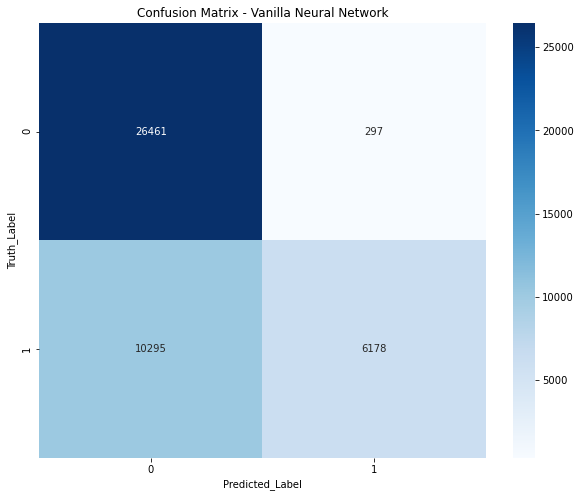

In [135]:
# Vanilla Neural Network 

# Reference - https://www.pluralsight.com/guides/machine-learning-neural-networks-scikit-learn

from sklearn.neural_network import MLPClassifier

mlpc = MLPClassifier(random_state = 4)

param_grid_2 = {'learning_rate': ['constant','adaptive'], 
                'learning_rate_init': [0.1, 1],
                'hidden_layer_sizes': [(100,), (200,)],
                'activation': ['relu']}

# Parameter Description
# learning_rate = schedule for weight updates
# learning_rate_init = the initial learning rate used
#                      controls the step-size in updating the weights
#                      only used when solver is ’sgd’ or ‘adam’
# hidden_layer_sizes = the ith element represents the number of neurons in the ith hidden layer
# activation = activation function for the hidden layer

mlp = GridSearchCV(estimator = mlpc, param_grid = param_grid_2, cv = 5)

start_2 = time.time()

# Fitting the model for grid search
mlp.fit(x_train, y_train.ravel())

end_2 = time.time()

print("Time consumed to fit model is ", end_2 - start_2)

print('Best parameters found:\n', mlp.best_params_)

# Predictions on the test set
mlp_predictions = mlp.predict(x_test)

print(classification_report(y_test.ravel(), mlp_predictions))

# Plotting the Confusion Matrix
conf_matrix_2 = confusion_matrix(y_test.ravel(), mlp_predictions)
plt.figure(figsize = (10,8))
sn.heatmap(conf_matrix_2, annot = True, cmap = 'Blues',  fmt = 'd', cbar = True)
plt.xlabel('Predicted_Label')
plt.ylabel('Truth_Label')
plt.title('Confusion Matrix - Vanilla Neural Network')

In [ ]:
# Compiling DL models on a CSV file that combines PCAP data from Wednesday-WorkingHours.pcap & Tuesday-WorkingHours.pcap
# with attack labels from an engineered CSV file named Wednesday-workingHours.csv & Tuesday-workingHours.csv

In [6]:
# Change this based on PCAP and CSV file location
pcap_file = 'C:/Users/sinja/OneDrive/Desktop/submit/Wednesday-WorkingHours.pcap'
csv_file = 'C:/Users/sinja/OneDrive/Desktop/submit/Wednesday-workingHours.csv'

# Storing data from CSV file in a dictionary
data = {}

with open(csv_file, 'r') as file:
    read = csv.DictReader(file)
    for row in read:
        key = (row[' Destination Port'])
        data[key] = row[' Label']

# Storing dataframes for each data type in a dictionary
dataframe = {}

def extract_features(packet):
    timestamp = packet.time
    
    # IP-related variables
    source_ip = None
    destination_ip = None
    src_port = None
    dst_port = None
    
    # Checking for the presence of an IP packet
    if IP in packet:
        source_ip = packet[IP].src
        destination_ip = packet[IP].dst
    
    # Checking for the presence of a TCP or UDP packet
    if TCP in packet:
        src_port = packet[TCP].sport
        dst_port = packet[TCP].dport 
    elif UDP in packet:
        src_port = packet[UDP].sport
        dst_port = packet[UDP].dport
    
    packet_length = len(packet)

    # Finding the data label based on the current packet attributes
    key = (str(dst_port))
    data_label = data.get(key, 'BENIGN')

    return [timestamp, source_ip, destination_ip, src_port, dst_port, packet_length, data_label]

for packet in PcapReader(pcap_file):
    features = extract_features(packet)
    data_label = features[-1] 
    
    if data_label not in dataframe:
        dataframe[data_label] = []

    dataframe[data_label].append(features)

# Creating seperate dataframes for each data type
for data_label, packets in dataframe.items():
    dataframe[data_label] = pd.DataFrame(packets, columns = ['Timestamp', 'Source_IP', 'Destination_IP', 'Source_Port', 
                                                             'Destination_Port', 'Packet_Length', 
                                                             'Attack_Label'])

# Combining all dataframes 
dataset = pd.concat(dataframe.values())

# Saving the combined dataset to a CSV file
dataset.to_csv('dataset_3.csv', index = False)

print('Combined dataset saved as dataset_3.csv')

Combined dataset saved as dataset_3.csv


In [7]:
file_1 = pd.read_csv('dataset_3.csv')
print(file_1)

             Timestamp      Source_IP   Destination_IP  Source_Port  \
0         1.499255e+09  192.168.10.15  239.255.255.250      49792.0   
1         1.499255e+09  192.168.10.15  239.255.255.250      49792.0   
2         1.499255e+09  192.168.10.15  239.255.255.250      49792.0   
3         1.499255e+09  192.168.10.15  239.255.255.250      49792.0   
4         1.499255e+09  192.168.10.15  239.255.255.250      49792.0   
...                ...            ...              ...          ...   
13788873  1.499280e+09     172.16.0.1    192.168.10.51      45022.0   
13788874  1.499280e+09     172.16.0.1    192.168.10.51      45022.0   
13788875  1.499280e+09     172.16.0.1    192.168.10.51      45022.0   
13788876  1.499280e+09     172.16.0.1    192.168.10.51      45022.0   
13788877  1.499280e+09     172.16.0.1    192.168.10.51      45022.0   

          Destination_Port  Packet_Length Attack_Label  
0                   1900.0            179       BENIGN  
1                   1900.0       

In [8]:
print("File columns:")
print(file_1.columns)

print("\nData value counts:")
print(file_1['Attack_Label'].value_counts())

File columns:
Index(['Timestamp', 'Source_IP', 'Destination_IP', 'Source_Port',
       'Destination_Port', 'Packet_Length', 'Attack_Label'],
      dtype='object')

Data value counts:
BENIGN           9642001
DoS GoldenEye    4118430
Heartbleed         28447
Name: Attack_Label, dtype: int64


In [9]:
# Specifying the target total size
total_size = 100000

# Obtaining unique class labels
unique_labels = file_1['Attack_Label'].unique()

# Creating an empty DataFrame to store the downsampled data
downsampled_data = pd.DataFrame()

# Iterating over each class label
for label in unique_labels:
    # Obtaining the rows for the current class
    class_data = file_1[file_1['Attack_Label'] == label]
    
    # Calculating the number of samples to keep for this class
    class_size = int(total_size * len(class_data) / len(file_1))
    
    # Downsampling the class
    downsampled_class = class_data.sample(class_size, random_state = 42)  
    
    # Appending the downsampled class to the new DataFrame
    downsampled_data = pd.concat([downsampled_data, downsampled_class], axis = 0)

dos_goldeneye = downsampled_data[downsampled_data['Attack_Label'] == 'DoS GoldenEye']

# Removing a portion of 'DoS GoldenEye' instances from the training set
ratio = int(0.5 * len(dos_goldeneye))  
dos_goldeneye_to_move = dos_goldeneye.sample(ratio, random_state = 42)

# Combining remaining training data after removing 'DoS GoldenEye' instances
remaining_data = pd.concat([downsampled_data, dos_goldeneye_to_move]).drop_duplicates(keep = False)

print(remaining_data['Attack_Label'].value_counts())

BENIGN           69925
DoS GoldenEye    14934
Heartbleed         206
Name: Attack_Label, dtype: int64


In [11]:
remaining_data.to_csv("balanced_multiclass_1.csv", index = False)

In [105]:
file_1 = pd.read_csv('balanced_multiclass_1.csv')

In [106]:
# Replacing non-numerical values
file_1.replace('Infinity', -1, inplace = True)

# Replacing NaN and Infinity values with -1
file_1.replace([np.inf, -np.inf, np.nan], -1, inplace = True)

# Converting 'Attack_Label' into binary format
file_1['Attack_Label'] = np.where(file_1['Attack_Label'] == 'BENIGN', 0, 1)

In [107]:
# Extracting 'Attack_Label' as 'y'
y = file_1['Attack_Label'].values

# Extracting remaining columns as 'x'
x = file_1.drop(columns = ['Source_IP', 'Destination_IP', 'Timestamp', 'Attack_Label'])

print("Before Scaling:")
print("\nY Values:")
print(y)
print("\nX Values:")
print(x)

Before Scaling:

Y Values:
[0 0 0 ... 1 1 1]

X Values:
       Source_Port  Destination_Port  Packet_Length
0             80.0           46830.0           5858
1             80.0           49533.0           1514
2          47968.0             443.0             97
3          48967.0             443.0             66
4             80.0           49772.0           1514
...            ...               ...            ...
85060      45022.0             444.0             66
85061      45022.0             444.0             66
85062      45022.0             444.0             66
85063      45022.0             444.0             66
85064      45022.0             444.0             66

[85065 rows x 3 columns]


In [108]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

# Fitting and transforming the features using Min-Max Scaling
x = scaler.fit_transform(x)

print("After Scaling:")
print("\nY Values:")
print(y)
print("\nX Values:")
print(x)

After Scaling:

Y Values:
[0 0 0 ... 1 1 1]

X Values:
[[1.23596191e-03 7.15031682e-01 2.64821412e-01]
 [1.23596191e-03 7.56302008e-01 6.64108888e-02]
 [7.31948853e-01 6.77914345e-03 1.68996072e-03]
 ...
 [6.86996460e-01 6.79441179e-03 2.74047684e-04]
 [6.86996460e-01 6.79441179e-03 2.74047684e-04]
 [6.86996460e-01 6.79441179e-03 2.74047684e-04]]


In [109]:
from sklearn.model_selection import train_test_split

# Splitting the data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size = 0.7, test_size = 0.3, random_state = 42)

print("Y Train:")
print(y_train)
print("\nX Train:")
print(x_train)

print("\nY Test:")
print(y_test)
print("\nX Test:")
print(x_test)

# Converting to Pandas Series
y_train_series = pd.Series(y_train)
y_test_series = pd.Series(y_test)

print("\nY Train value counts:")
print(y_train_series.value_counts())
print("\nY Test value counts:")
print(y_test_series.value_counts())

Y Train:
[0 0 0 ... 1 0 0]

X Train:
[[8.42361450e-01 6.77914345e-03 0.00000000e+00]
 [1.23596191e-03 7.56302008e-01 6.64108888e-02]
 [8.55484009e-01 6.77914345e-03 2.74047684e-04]
 ...
 [7.55828857e-01 1.23673563e-03 0.00000000e+00]
 [1.23596191e-03 8.31926101e-01 2.74047684e-04]
 [1.23596191e-03 7.58424307e-01 1.33095825e-01]]

Y Test:
[0 1 0 ... 0 0 0]

X Test:
[[0.00123596 0.75842431 0.13309583]
 [0.75794983 0.00123674 0.        ]
 [0.00123596 0.75842431 0.06641089]
 ...
 [0.00123596 0.75630201 0.13309583]
 [0.76115417 0.00677914 0.        ]
 [0.00123596 0.80633636 0.06641089]]

Y Train value counts:
0    48845
1    10700
dtype: int64

Y Test value counts:
0    21080
1     4440
dtype: int64


In [30]:
# Change this based on PCAP and CSV file location
pcap_file = 'C:/Users/sinja/OneDrive/Desktop/submit/Tuesday-WorkingHours.pcap'
csv_file = 'C:/Users/sinja/OneDrive/Desktop/submit/Tuesday-workingHours.csv'

# Storing data from CSV file in a dictionary
data = {}

with open(csv_file, 'r') as file:
    read = csv.DictReader(file)
    for row in read:
        key = (row[' Destination Port'])
        data[key] = row[' Label']

# Storing dataframes for each data type in a dictionary
dataframe = {}

def extract_features(packet):
    timestamp = packet.time
    
    # IP-related variables
    source_ip = None
    destination_ip = None
    src_port = None
    dst_port = None
    
    # Checking for the presence of an IP packet
    if IP in packet:
        source_ip = packet[IP].src
        destination_ip = packet[IP].dst
    
    # Checking for the presence of a TCP or UDP packet
    if TCP in packet:
        src_port = packet[TCP].sport
        dst_port = packet[TCP].dport 
    elif UDP in packet:
        src_port = packet[UDP].sport
        dst_port = packet[UDP].dport
    
    packet_length = len(packet)

    # Finding the data label based on the current packet attributes
    key = (str(dst_port))
    data_label = data.get(key, 'BENIGN')

    return [timestamp, source_ip, destination_ip, src_port, dst_port, packet_length, data_label]

for packet in PcapReader(pcap_file):
    features = extract_features(packet)
    data_label = features[-1] 
    
    if data_label not in dataframe:
        dataframe[data_label] = []

    dataframe[data_label].append(features)

# Creating seperate dataframes for each data type
for data_label, packets in dataframe.items():
    dataframe[data_label] = pd.DataFrame(packets, columns = ['Timestamp', 'Source_IP', 'Destination_IP', 'Source_Port', 
                                                             'Destination_Port', 'Packet_Length', 
                                                             'Attack_Label'])

# Combining all dataframes 
dataset = pd.concat(dataframe.values())

# Saving the combined dataset to a CSV file
dataset.to_csv('dataset_4.csv', index = False)

print('Combined dataset saved as dataset_4.csv')

Combined dataset saved as dataset_4.csv


In [31]:
file_2 = pd.read_csv('dataset_4.csv')
print(file_2)

             Timestamp      Source_IP Destination_IP  Source_Port  \
0         1.499169e+09            NaN            NaN          NaN   
1         1.499169e+09            NaN            NaN        546.0   
2         1.499169e+09            NaN            NaN        546.0   
3         1.499169e+09            NaN            NaN        546.0   
4         1.499169e+09            NaN            NaN        546.0   
...                ...            ...            ...          ...   
11551949  1.499198e+09  192.168.10.14  192.168.10.50      62707.0   
11551950  1.499198e+09  192.168.10.14  192.168.10.50      62707.0   
11551951  1.499198e+09  192.168.10.14  192.168.10.50      62707.0   
11551952  1.499198e+09  192.168.10.14  192.168.10.50      62707.0   
11551953  1.499198e+09  192.168.10.14  192.168.10.50      62707.0   

          Destination_Port  Packet_Length Attack_Label  
0                      NaN            457       BENIGN  
1                    547.0            165       BENIGN  


In [32]:
print("File columns:")
print(file_2.columns)

print("\nData value counts:")
print(file_2['Attack_Label'].value_counts())

File columns:
Index(['Timestamp', 'Source_IP', 'Destination_IP', 'Source_Port',
       'Destination_Port', 'Packet_Length', 'Attack_Label'],
      dtype='object')

Data value counts:
BENIGN         11444297
SSH-Patator      107657
Name: Attack_Label, dtype: int64


In [33]:
# Specifying the target total size
total_size = 100000

# Obtaining unique class labels
unique_labels = file_2['Attack_Label'].unique()

# Creating an empty DataFrame to store the downsampled data
downsampled_data = pd.DataFrame()

# Iterating over each class label
for label in unique_labels:
    # Obtaining the rows for the current class
    class_data = file_2[file_2['Attack_Label'] == label]
    
    # Calculating the number of samples to keep for this class
    class_size = int(total_size * len(class_data) / len(file_2))
    
    # Downsampling the class
    downsampled_class = class_data.sample(class_size, random_state = 42)  
    
    # Appending the downsampled class to the new DataFrame
    downsampled_data = pd.concat([downsampled_data, downsampled_class], axis = 0)

print(downsampled_data['Attack_Label'].value_counts())

BENIGN         99068
SSH-Patator      931
Name: Attack_Label, dtype: int64


In [34]:
ssh = downsampled_data[downsampled_data['Attack_Label'] != 'BENIGN']

In [ ]:
ssh.to_csv("balanced_multiclass_2.csv", index = False)

In [110]:
file_2 = pd.read_csv('balanced_multiclass_2.csv')

In [111]:
# Replacing non-numerical values
file_2.replace('Infinity', -1, inplace = True)

# Replacing NaN and Infinity values with -1
file_2.replace([np.inf, -np.inf, np.nan], -1, inplace = True)

# Converting 'Attack_Label' into binary format
file_2['Attack_Label'] = np.where(file_2['Attack_Label'] == 'BENIGN', 0, 1)

In [112]:
# Extracting 'Attack_Label' as 'y'
y = file_2['Attack_Label'].values

# Extracting remaining columns as 'x'
x = file_2.drop(columns = ['Source_IP', 'Destination_IP', 'Timestamp', 'Attack_Label'])

print("Before Scaling:")
print("\nY Values:")
print(y)
print("\nX Values:")
print(x)

Before Scaling:

Y Values:
[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 

In [113]:
scaler = MinMaxScaler()

# Fitting and transforming the features using Min-Max Scaling
x = scaler.fit_transform(x)

print("After Scaling:")
print("\nY Values:")
print(y)
print("\nX Values:")
print(x)

After Scaling:

Y Values:
[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1

In [114]:
# Concatenating x_test with x
x_test = np.concatenate((x_test, x), axis = 0)

# Concatenating y_test with y
y_test = np.concatenate((y_test, y), axis = 0)

In [115]:
print("\nX Train:")
print(x_train)
print("\nY Train:")
print(y_train)
print("\nX Test:")
print(x_test)
print("\nY Test:")
print(y_test)


X Train:
[[8.42361450e-01 6.77914345e-03 0.00000000e+00]
 [1.23596191e-03 7.56302008e-01 6.64108888e-02]
 [8.55484009e-01 6.77914345e-03 2.74047684e-04]
 ...
 [7.55828857e-01 1.23673563e-03 0.00000000e+00]
 [1.23596191e-03 8.31926101e-01 2.74047684e-04]
 [1.23596191e-03 7.58424307e-01 1.33095825e-01]]

Y Train:
[0 0 0 ... 1 0 0]

X Test:
[[0.00123596 0.75842431 0.13309583]
 [0.75794983 0.00123674 0.        ]
 [0.00123596 0.75842431 0.06641089]
 ...
 [0.11605747 0.         0.        ]
 [0.76359464 0.         0.10835913]
 [0.79379386 0.         0.18266254]]

Y Test:
[0 1 0 ... 1 1 1]


In [33]:
from keras.models import Sequential
from keras.layers import LSTM, SimpleRNN, Dense
from keras.layers import Conv1D, MaxPooling1D, Flatten
from keras.utils import to_categorical

from sklearn.preprocessing import LabelEncoder

In [34]:
# Defining the fixed sequence length
sequence_length = 2

# Reshaping the data into sequences with the specified sequence length
def create_sequences(data, labels, sequence_length):
    num_sequences = len(data) - sequence_length + 1
    x_sequences, y_sequences = [], []
    
    for i in range(num_sequences):
        x_sequences.append(data[i : i + sequence_length])
        y_sequences.append(labels[i + sequence_length - 1])
        
    return np.array(x_sequences), np.array(y_sequences)

Epoch 1/10
3722/3722 [==============================] - 16s 4ms/step - loss: 0.2834 - accuracy: 0.8005 - val_loss: 0.2896 - val_accuracy: 0.8004
Epoch 2/10
3722/3722 [==============================] - 11s 3ms/step - loss: 0.2613 - accuracy: 0.8218 - val_loss: 0.3078 - val_accuracy: 0.8063
Epoch 3/10
3722/3722 [==============================] - 16s 4ms/step - loss: 0.2527 - accuracy: 0.8464 - val_loss: 0.3121 - val_accuracy: 0.8096
Epoch 4/10
3722/3722 [==============================] - 17s 5ms/step - loss: 0.2377 - accuracy: 0.8766 - val_loss: 0.3126 - val_accuracy: 0.9098
Epoch 5/10
3722/3722 [==============================] - 14s 4ms/step - loss: 0.2097 - accuracy: 0.9196 - val_loss: 0.2995 - val_accuracy: 0.9229
Epoch 6/10
3722/3722 [==============================] - 17s 4ms/step - loss: 0.1713 - accuracy: 0.9480 - val_loss: 0.2472 - val_accuracy: 0.9396
Epoch 7/10
3722/3722 [==============================] - 16s 4ms/step - loss: 0.1381 - accuracy: 0.9595 - val_loss: 0.1834 - val_ac

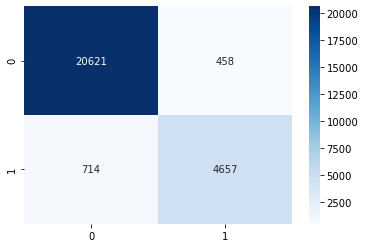

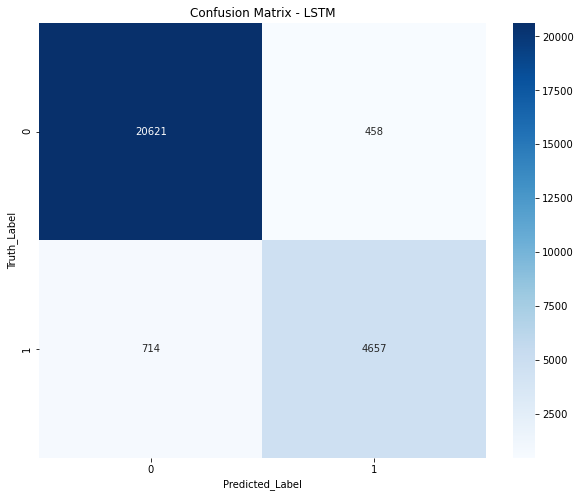

In [22]:
# Long Short-Term Memory

x_train, y_train = create_sequences(x_train, y_train, sequence_length)
x_test, y_test = create_sequences(x_test, y_test, sequence_length)

# Encoding labels using LabelEncoder
label_encoder = LabelEncoder()

y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.transform(y_test)

num_classes = len(np.unique(y_train_encoded))

# Converting labels to one-hot encoding for both training and testing data
y_train_encoded = to_categorical(y_train_encoded)
y_test_encoded = to_categorical(y_test_encoded)

# Defining the model
model = Sequential()
model.add(LSTM(units = 50, input_shape = (sequence_length, x_train.shape[2])))
model.add(Dense(units = num_classes, activation = 'softmax'))

# Compiling the model
model.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])

start = time.time()

# Training the model
history = model.fit(x_train, y_train_encoded, epochs = 10, batch_size = 16, validation_data = (x_test, y_test_encoded))

end = time.time()

print("Time consumed to fit model is ", end - start)

# Predicting by using the trained model
y_pred = model.predict(x_test)
y_pred_classes = np.argmax(y_pred, axis = 1)
y_true = np.argmax(y_test_encoded, axis = 1)

# Generating the Confusion Matrix
confusion_mat = confusion_matrix(y_true, y_pred_classes)
print(classification_report(y_true, y_pred_classes, zero_division = 0))

# Plotting the Confusion Matrix
sn.heatmap(confusion_mat, annot = True, cmap = 'Blues', fmt = 'd', cbar = True)
plt.figure(figsize = (10, 8))
sn.heatmap(confusion_mat, annot = True, cmap = 'Blues', fmt = 'd', cbar = True)
plt.xlabel('Predicted_Label')
plt.ylabel('Truth_Label')
plt.title('Confusion Matrix - LSTM')
plt.show()

Epoch 1/10
3722/3722 [==============================] - 8s 2ms/step - loss: 0.2819 - accuracy: 0.8051 - val_loss: 0.3213 - val_accuracy: 0.7967
Epoch 2/10
3722/3722 [==============================] - 14s 4ms/step - loss: 0.2678 - accuracy: 0.8174 - val_loss: 0.2970 - val_accuracy: 0.8066
Epoch 3/10
3722/3722 [==============================] - 11s 3ms/step - loss: 0.2637 - accuracy: 0.8252 - val_loss: 0.3079 - val_accuracy: 0.8122
Epoch 4/10
3722/3722 [==============================] - 11s 3ms/step - loss: 0.2566 - accuracy: 0.8428 - val_loss: 0.3287 - val_accuracy: 0.7980
Epoch 5/10
3722/3722 [==============================] - 10s 3ms/step - loss: 0.2390 - accuracy: 0.8817 - val_loss: 0.3043 - val_accuracy: 0.9082
Epoch 6/10
3722/3722 [==============================] - 9s 2ms/step - loss: 0.2077 - accuracy: 0.9280 - val_loss: 0.2842 - val_accuracy: 0.9312
Epoch 7/10
3722/3722 [==============================] - 11s 3ms/step - loss: 0.1706 - accuracy: 0.9511 - val_loss: 0.2343 - val_accu

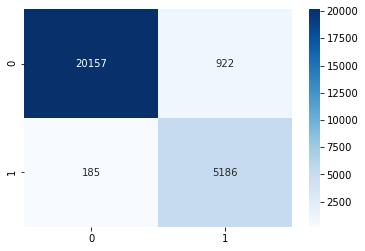

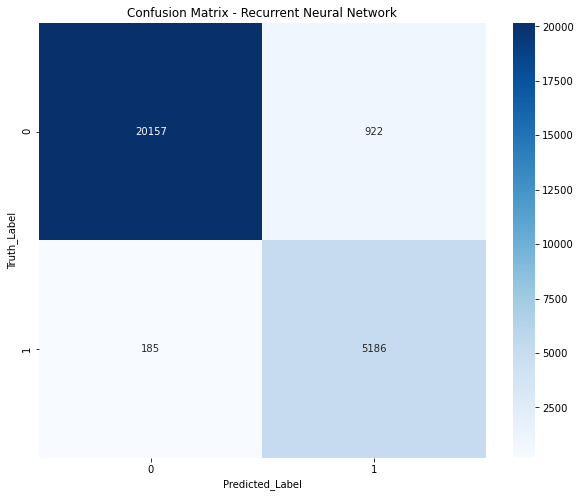

In [19]:
# Recurrent Neural Network

x_train, y_train = create_sequences(x_train, y_train, sequence_length)
x_test, y_test = create_sequences(x_test, y_test, sequence_length)

# Encoding labels using LabelEncoder
label_encoder = LabelEncoder()

y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.transform(y_test)

num_classes = len(np.unique(y_train_encoded))

# Converting labels to one-hot encoding for both training and testing data
y_train_encoded = to_categorical(y_train_encoded)
y_test_encoded = to_categorical(y_test_encoded)

# Defining the model 
model = Sequential()
model.add(SimpleRNN(units = 50, input_shape = (sequence_length, x_train.shape[2])))
model.add(Dense(units = num_classes, activation = 'softmax'))

# Compiling the model
model.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])

start = time.time()

# Training the model
history = model.fit(x_train, y_train_encoded, epochs = 10, batch_size = 16, validation_data = (x_test, y_test_encoded))

end = time.time()

print("Time consumed to fit model is ", end - start)

# Predicting by using the trained model
y_pred = model.predict(x_test)
y_pred_classes = np.argmax(y_pred, axis = 1)
y_true = np.argmax(y_test_encoded, axis = 1)

# Generating the Confusion Matrix
confusion_mat = confusion_matrix(y_true, y_pred_classes)
print(classification_report(y_true, y_pred_classes, zero_division = 0))

# Plotting the Confusion Matrix
sn.heatmap(confusion_mat, annot = True, cmap = 'Blues', fmt = 'd', cbar = True)
plt.figure(figsize = (10, 8))
sn.heatmap(confusion_mat, annot = True, cmap = 'Blues', fmt = 'd', cbar = True)
plt.xlabel('Predicted_Label')
plt.ylabel('Truth_Label')
plt.title('Confusion Matrix - Recurrent Neural Network')
plt.show()

Epoch 1/10
3722/3722 [==============================] - 7s 2ms/step - loss: 0.3571 - accuracy: 0.8239 - val_loss: 0.3614 - val_accuracy: 0.8091
Epoch 2/10
3722/3722 [==============================] - 11s 3ms/step - loss: 0.3035 - accuracy: 0.8372 - val_loss: 0.2961 - val_accuracy: 0.8313
Epoch 3/10
3722/3722 [==============================] - 15s 4ms/step - loss: 0.2716 - accuracy: 0.8379 - val_loss: 0.2685 - val_accuracy: 0.8482
Epoch 4/10
3722/3722 [==============================] - 10s 3ms/step - loss: 0.2651 - accuracy: 0.8389 - val_loss: 0.2715 - val_accuracy: 0.8445
Epoch 5/10
3722/3722 [==============================] - 9s 3ms/step - loss: 0.2629 - accuracy: 0.8397 - val_loss: 0.2647 - val_accuracy: 0.8464
Epoch 6/10
3722/3722 [==============================] - 9s 2ms/step - loss: 0.2608 - accuracy: 0.8410 - val_loss: 0.2637 - val_accuracy: 0.8504
Epoch 7/10
3722/3722 [==============================] - 9s 2ms/step - loss: 0.2605 - accuracy: 0.8429 - val_loss: 0.2614 - val_accura

Text(0.5, 1.0, 'Confusion Matrix - Convolutional Neural Network')

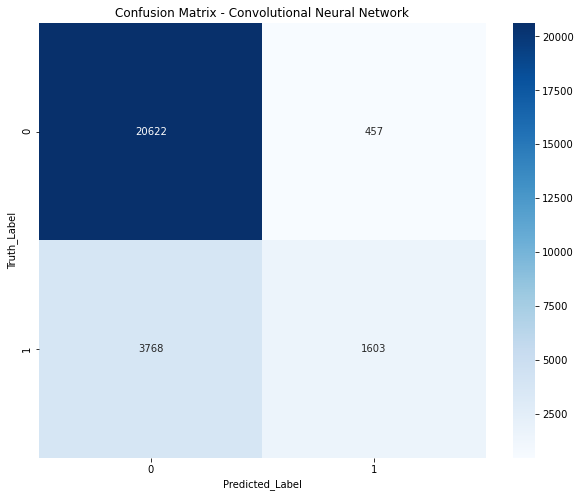

In [35]:
# Convolutional Neural Network - 1D

x_train, y_train = create_sequences(x_train, y_train, sequence_length)
x_test, y_test = create_sequences(x_test, y_test, sequence_length)

num_features = x_train.shape[-1]

# Reshaping the data 
x_train_cnn = x_train.reshape(-1, sequence_length, num_features)
x_test_cnn = x_test.reshape(-1, sequence_length, num_features)

# Encoding labels using LabelEncoder
label_encoder = LabelEncoder()

y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.transform(y_test)

num_classes = len(np.unique(y_train_encoded))

# Converting labels to one-hot encoding for both training and testing data
y_train_encoded = to_categorical(y_train_encoded)
y_test_encoded = to_categorical(y_test_encoded)

# Defining the model 
model = Sequential()
model.add(Conv1D(32, kernel_size = 1, activation = 'relu', input_shape = (sequence_length, num_features)))
model.add(MaxPooling1D(pool_size = 2))
model.add(Flatten())
model.add(Dense(128, activation = 'relu'))
model.add(Dense(num_classes, activation = 'softmax'))

# Compiling the model
model.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])

start = time.time()

history = model.fit(x_train_cnn, y_train_encoded, epochs = 10, batch_size = 16,
                    validation_data = (x_test_cnn, y_test_encoded))

end = time.time()

print("Time consumed to fit CNN model is ", end - start)

# Predicting by using the trained model
y_pred = model.predict(x_test_cnn)
y_pred_classes = np.argmax(y_pred, axis = 1)
y_true = np.argmax(y_test_encoded, axis = 1)

# Generating the Confusion Matrix
confusion_mat = confusion_matrix(y_true, y_pred_classes)

print("Classification Report:")
print(classification_report(y_true, y_pred_classes, zero_division = 0))

# Plotting the Confusion Matrix
plt.figure(figsize = (10, 8))
sn.heatmap(confusion_mat, annot = True, cmap = 'Blues', fmt = 'd', cbar = True)
plt.xlabel('Predicted_Label')
plt.ylabel('Truth_Label')
plt.title('Confusion Matrix - Convolutional Neural Network')